## Merge file 

In [12]:
import csv
import pandas as pd 

# Generate filenames programmatically
path = "/Volumes/Kingston XS2000 Media/XGBoost_OD_TBBE/XGBoostTBBE/100sim65Xgb2StatData/"
files = [path + "new_final_balance_{}.csv".format(i) for i in range(100)]

merged_filename = "/Volumes/Kingston XS2000 Media/XGBoost_OD_TBBE/XGBoostTraining/StatTestXgb2/65stat_merge_result.csv"

with open(merged_filename, 'w', newline='') as outfile:
    writer = csv.writer(outfile)
    
    for index, filename in enumerate(files):
        with open(filename, 'r') as infile:
            reader = csv.reader(infile)
            
            # Skip header only if it's not the first file
            if index != 0:
                next(reader, None)
                
            # Write rows from current file to the output file
            writer.writerows(reader)

## Find average of each betting agents. 

In [13]:
import pandas as pd

# Read the data
df = pd.read_csv(
    "/Volumes/Kingston XS2000 Media/XGBoost_OD_TBBE/XGBoostTraining/StatTestXgb2/65stat_merge_result.csv",
    header=None,
)

# Drop the header row
df = df.drop(0)

# Convert all values to float
df = df.astype(float)

# Define ranges for mapping => to group agents with same type/category
ranges = [ 
    (0, 10, 1),
    (10, 20, 2),
    (20, 30, 3),
    (30, 40, 4),
    (40, 50, 5),
    (50, 55, 6),
    (55, 60, 7),
    (60, 65, 8)
]

# Create a mapping function based on ranges
def get_mapping(col):
    for start, end, category in ranges:
        if start <= col < end:
            return category

# Create a new DataFrame with mapped columns
mapped_df = df.copy()
mapped_df.columns = [get_mapping(col) for col in df.columns]

# Group by column categories and compute the mean
averaged_df = mapped_df.groupby(mapped_df.columns, axis=1).mean()
averaged_df = averaged_df - 100000000

print(averaged_df)

               1            2          3           4          5            6  \
1    -263.804310  -123.948241   4.391916 -338.784094  16.223990   343.157647   
2    -345.133574   504.321639 -31.992864 -245.446115  15.828576   206.959393   
3    -557.108851   905.642654  -7.173683 -236.477607  42.523990   844.992170   
4    -227.689066   219.690391 -21.420005  -65.761136  19.140009  -329.479689   
5     292.906037  -252.023086 -32.785143 -289.500000  20.014057  -144.349790   
..           ...          ...        ...         ...        ...          ...   
96      9.863643    29.951613  -5.651377  -42.782337   0.000000    39.194271   
97   1097.592133  -705.000000   1.500000 -496.500000   0.000000   679.395958   
98   -240.974050    41.048881 -10.073580 -125.274831  18.220740  -207.000000   
99   -419.063063 -1307.873218  11.793303 -135.060195  20.965545  3190.906505   
100  -335.771652   930.740500 -63.372506 -242.350811  56.120384  -358.021147   

              7           8  
1    494.

/var/folders/56/1wgtsx053h5_2lvs_fqprbsw0000gn/T/ipykernel_55502/1095242099.py:38: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  averaged_df = mapped_df.groupby(mapped_df.columns, axis=1).mean()


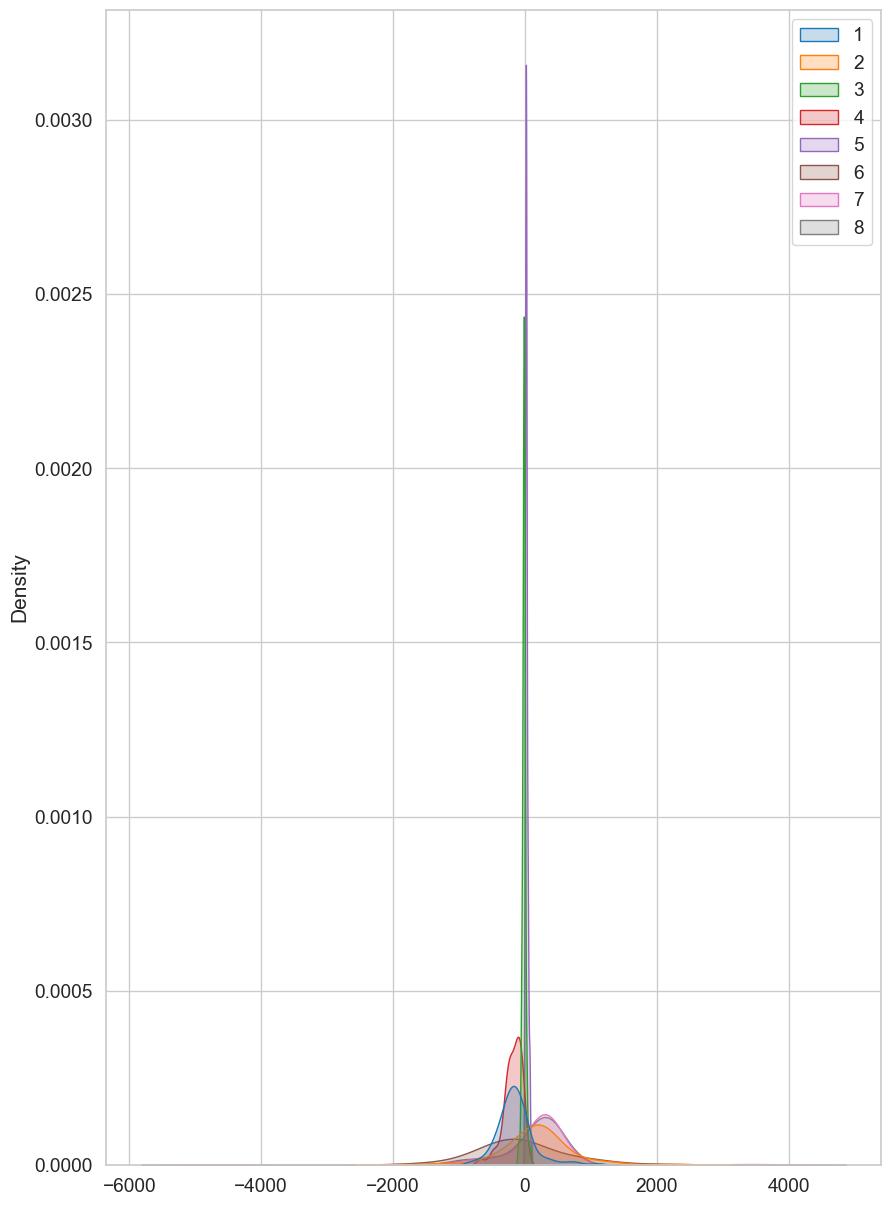

In [14]:
import seaborn as sns 
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 15))
distributionPlot = sns.kdeplot(data=averaged_df,fill=True)
plt.show()


## Statistical Testing

In [15]:
from scipy import stats
xgboost2_avg_balance = averaged_df.iloc[:, 7]  # XGBoost column

# Loop through columns 1-7 for other agents
for col_index in range(7):
    other_agent_balance = averaged_df.iloc[:, col_index]
    # Check normality for both columns
    _, pvalue_xgboost2 = stats.shapiro(xgboost2_avg_balance)
    _, pvalue_other_agent = stats.shapiro(other_agent_balance)
    print("P_value_xgboost1",pvalue_xgboost2)
    print("pvalue_other_agent ",pvalue_other_agent)
    # If both are normally distributed
    if pvalue_xgboost2 > 0.05 and pvalue_other_agent > 0.05:
        
        print("normal")
        statistic, pvalue = stats.ttest_ind(xgboost2_avg_balance, other_agent_balance)
        if pvalue < 0.05:
            print("There is a statistically significant difference")
        else:
            print("There isn't a statistically significant difference")
    else:
        print("not normal")
        # If either or both are not normally distributed
        statistic, pvalue = stats.mannwhitneyu(xgboost2_avg_balance, other_agent_balance)
        if pvalue < 0.05:
            print("There is a statistically significant difference")
            print("P-Value", pvalue)
            print("")
        else:
            print("There isn't a statistically significant difference")


P_value_xgboost1 1.4005875581825263e-07
pvalue_other_agent  5.343473803392102e-07
not normal
There is a statistically significant difference
P-Value 1.3833704547418206e-11

P_value_xgboost1 1.4005875581825263e-07
pvalue_other_agent  9.147707877224603e-06
not normal
There isn't a statistically significant difference
P_value_xgboost1 1.4005875581825263e-07
pvalue_other_agent  0.00010199771094736898
not normal
There is a statistically significant difference
P-Value 1.0532515401904806e-10

P_value_xgboost1 1.4005875581825263e-07
pvalue_other_agent  4.683827448884721e-06
not normal
There is a statistically significant difference
P-Value 7.359157269041792e-16

P_value_xgboost1 1.4005875581825263e-07
pvalue_other_agent  4.129865963641126e-07
not normal
There is a statistically significant difference
P-Value 2.155285997697654e-08

P_value_xgboost1 1.4005875581825263e-07
pvalue_other_agent  7.791776094174606e-09
not normal
There is a statistically significant difference
P-Value 0.00015764773397

# Stat test with plotting

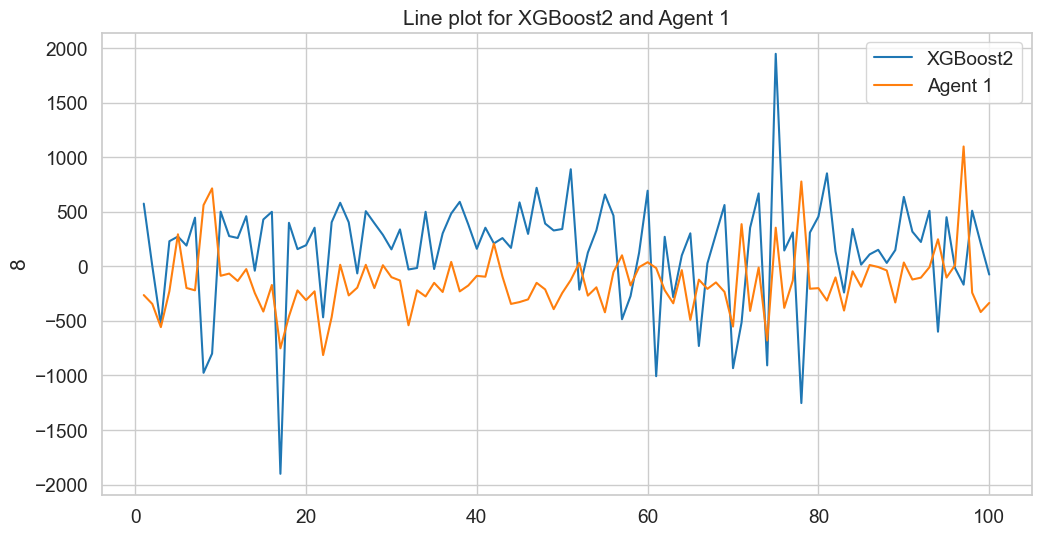

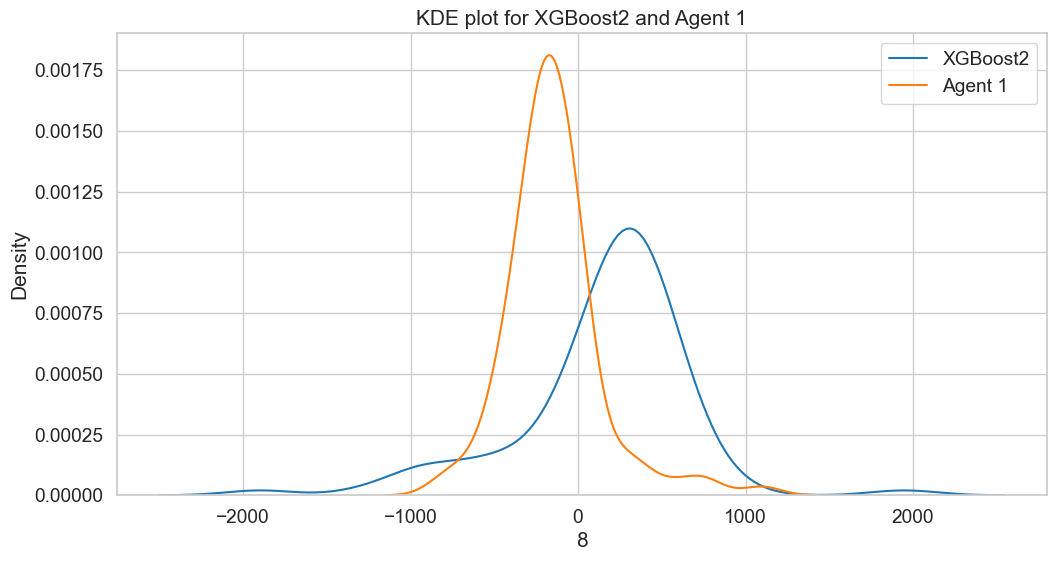

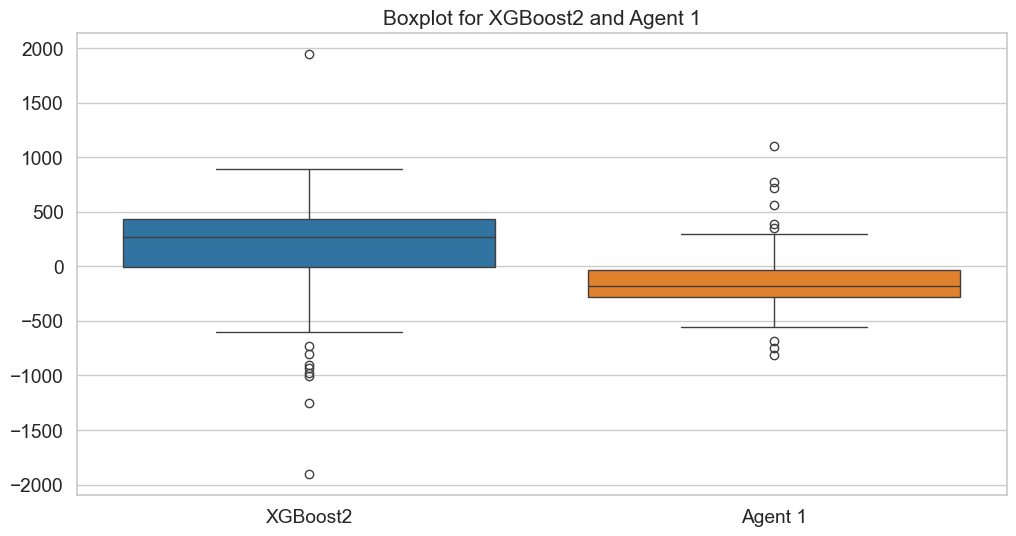

P_value_xgboost2 1.4005875581825263e-07
pvalue_other_agent  5.343473803392102e-07
not normal
There is a statistically significant difference
P-Value 1.3833704547418206e-11



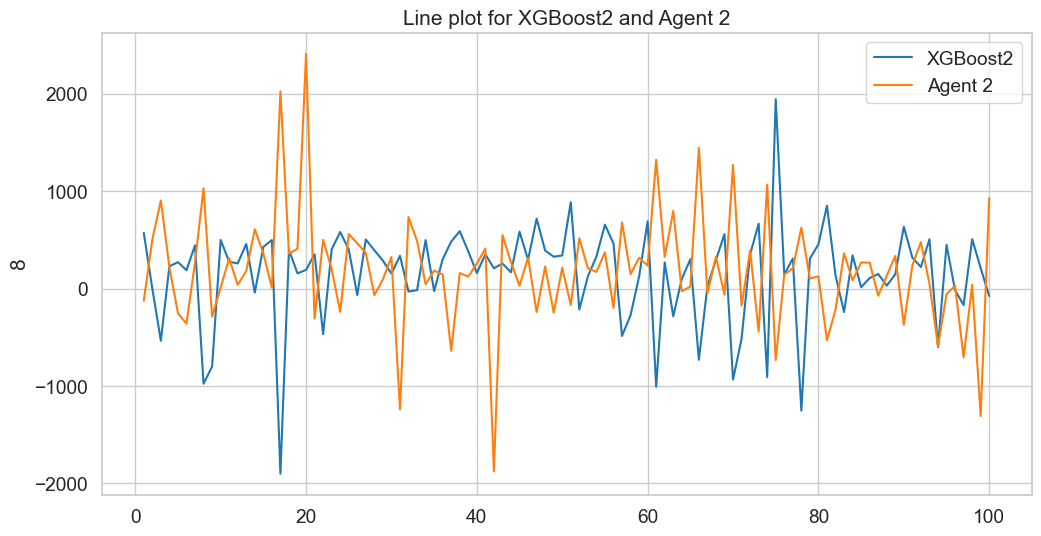

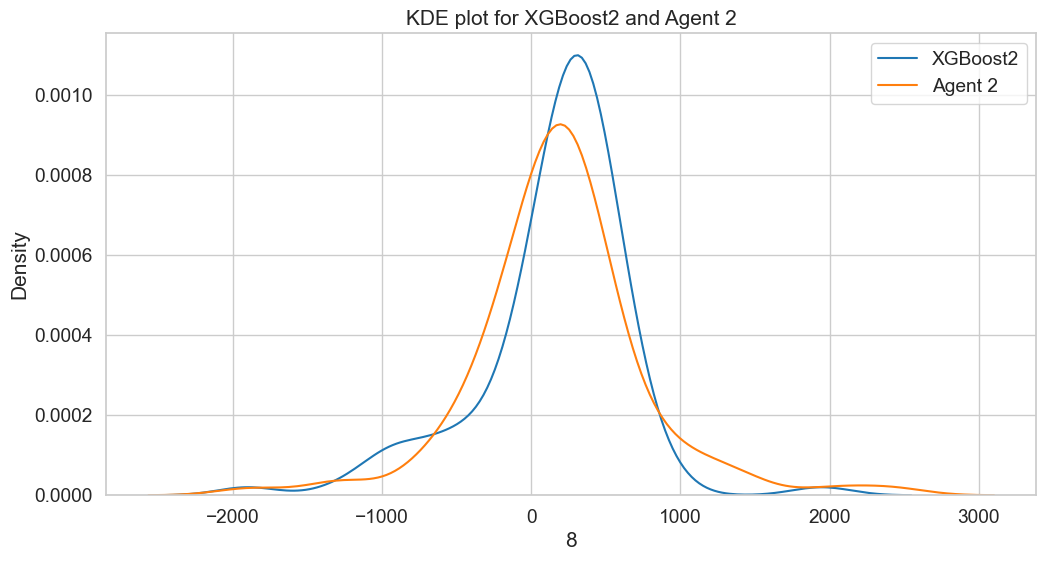

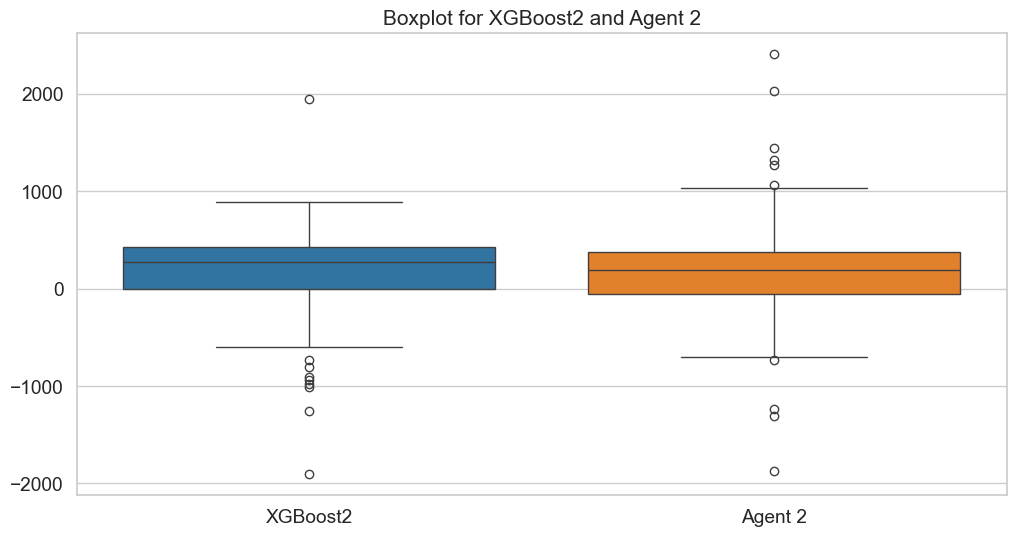

P_value_xgboost2 1.4005875581825263e-07
pvalue_other_agent  9.147707877224603e-06
not normal
There isn't a statistically significant difference


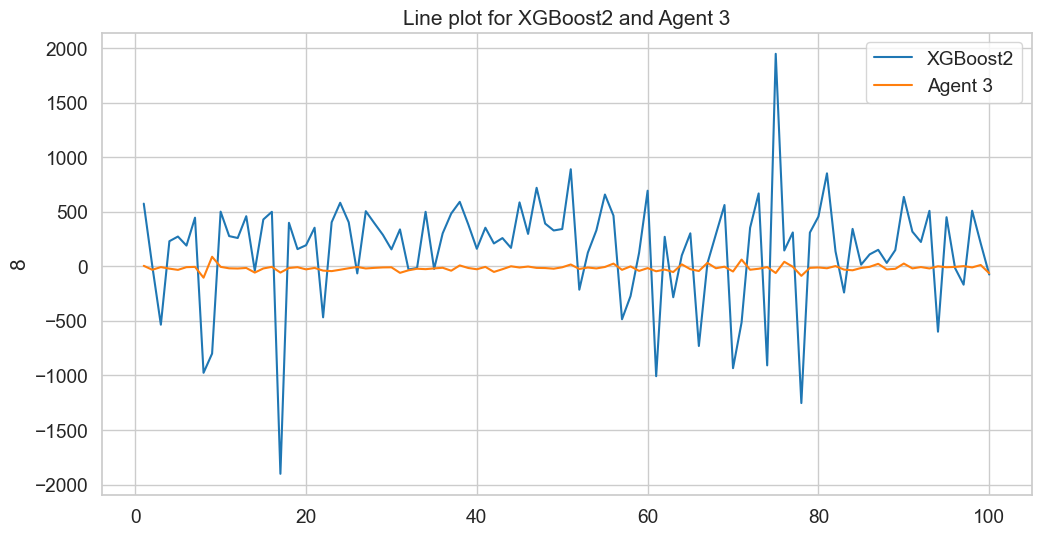

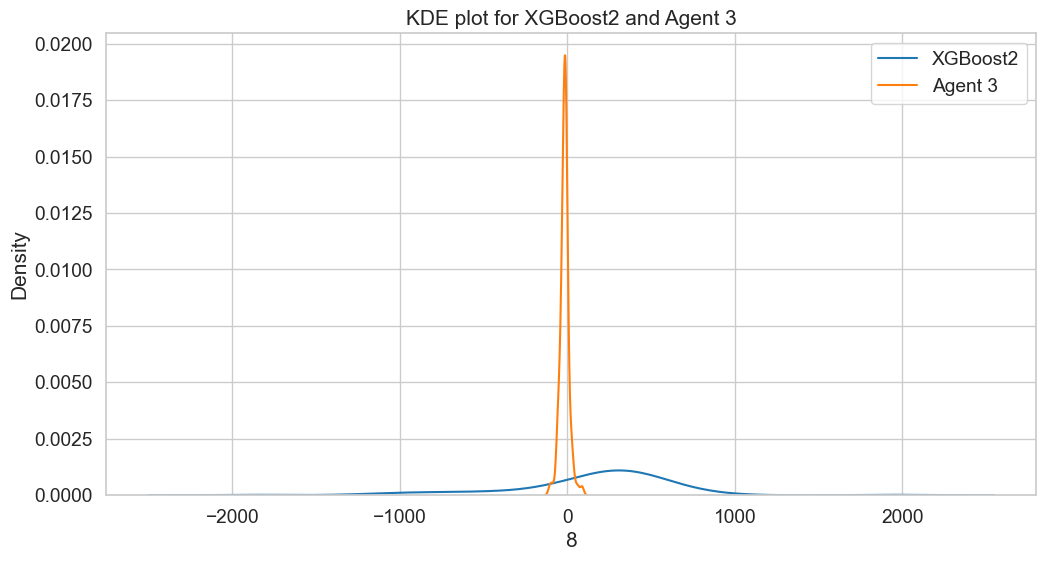

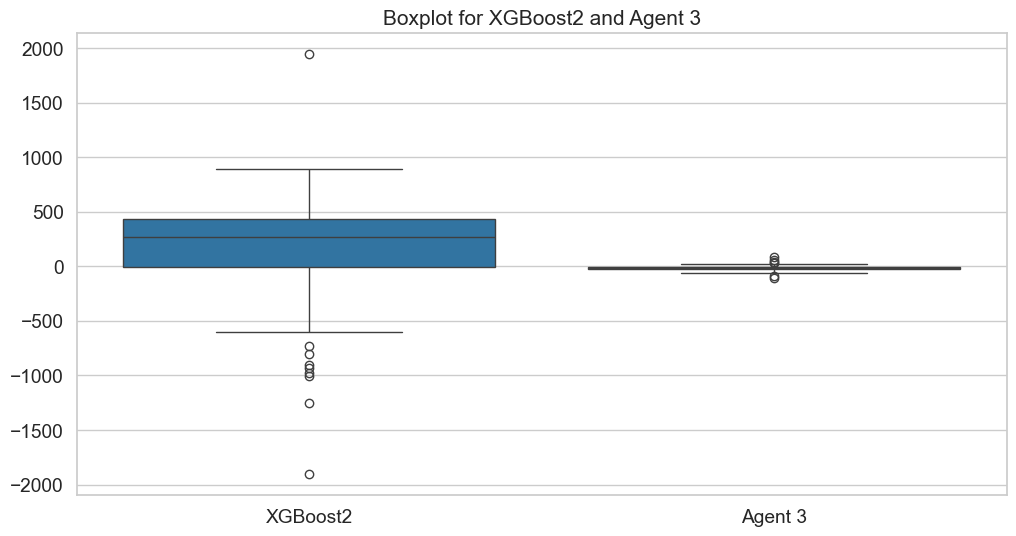

P_value_xgboost2 1.4005875581825263e-07
pvalue_other_agent  0.00010199771094736898
not normal
There is a statistically significant difference
P-Value 1.0532515401904806e-10



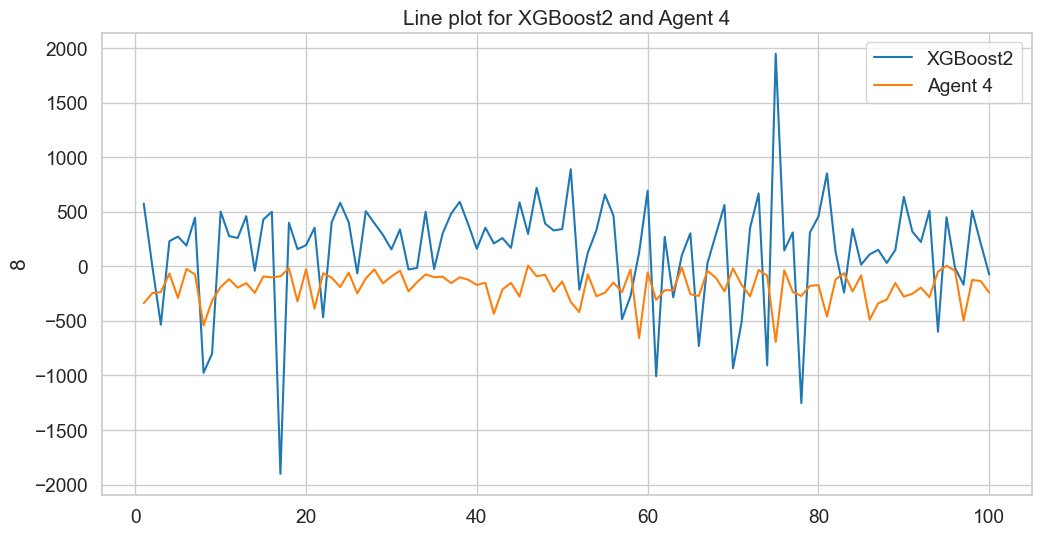

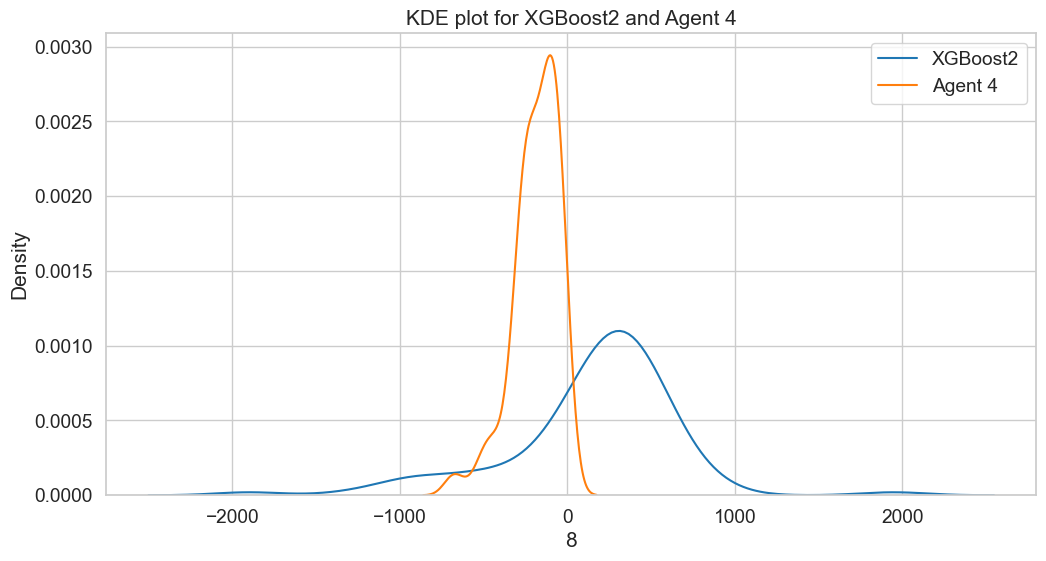

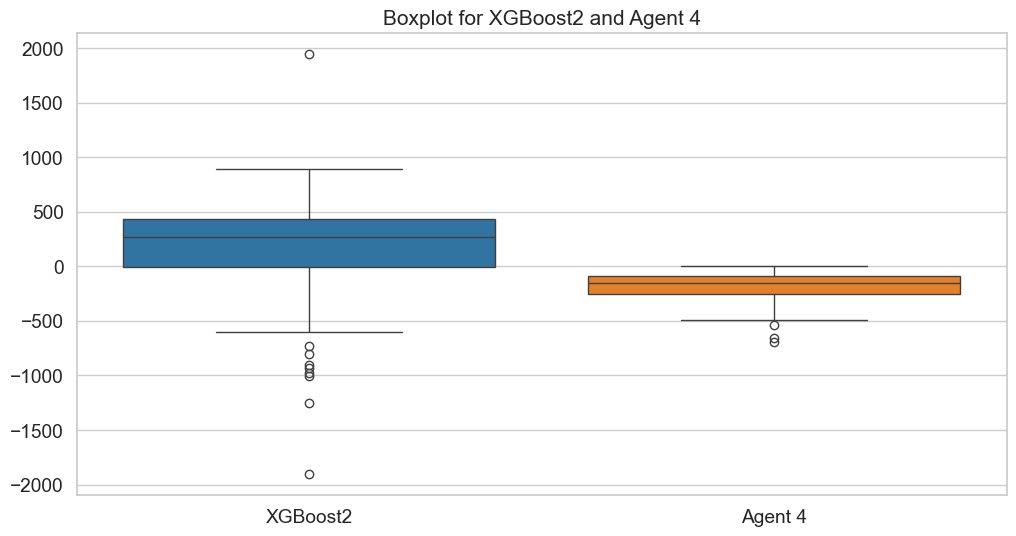

P_value_xgboost2 1.4005875581825263e-07
pvalue_other_agent  4.683827448884721e-06
not normal
There is a statistically significant difference
P-Value 7.359157269041792e-16



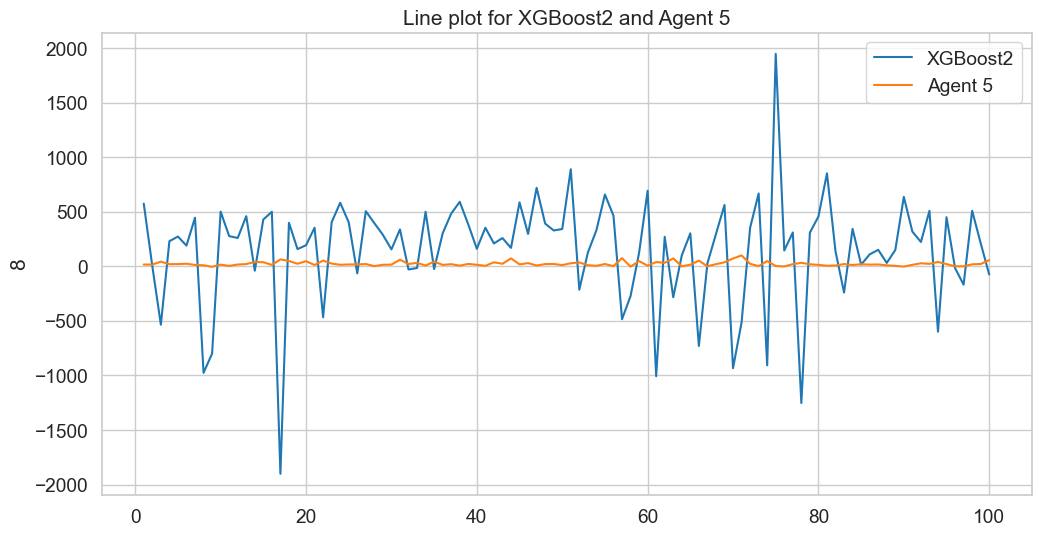

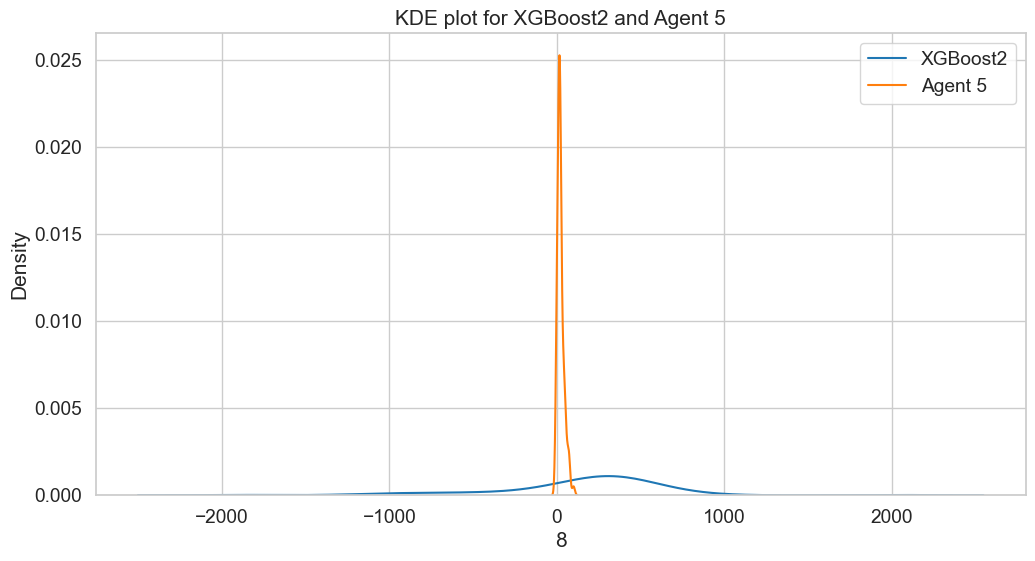

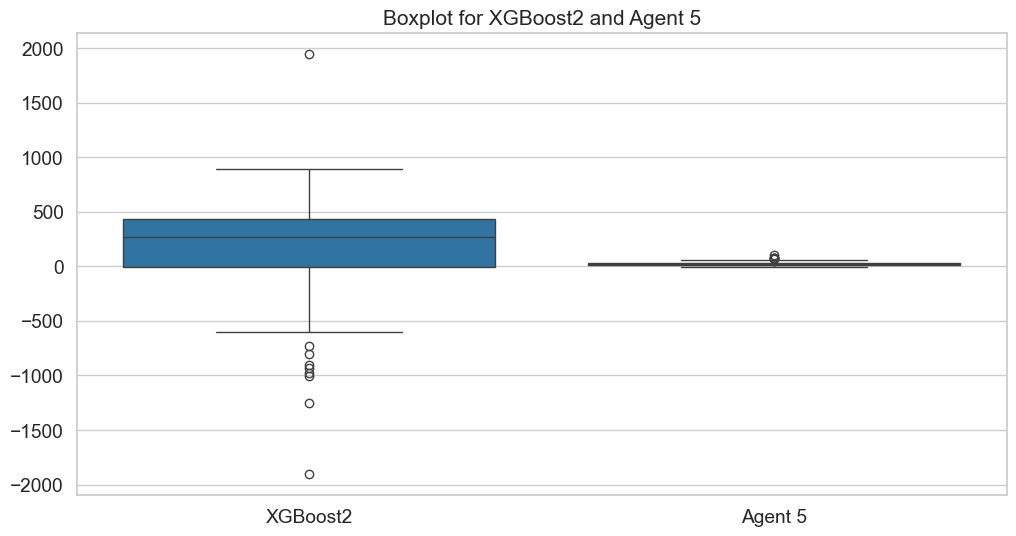

P_value_xgboost2 1.4005875581825263e-07
pvalue_other_agent  4.129865963641126e-07
not normal
There is a statistically significant difference
P-Value 2.155285997697654e-08



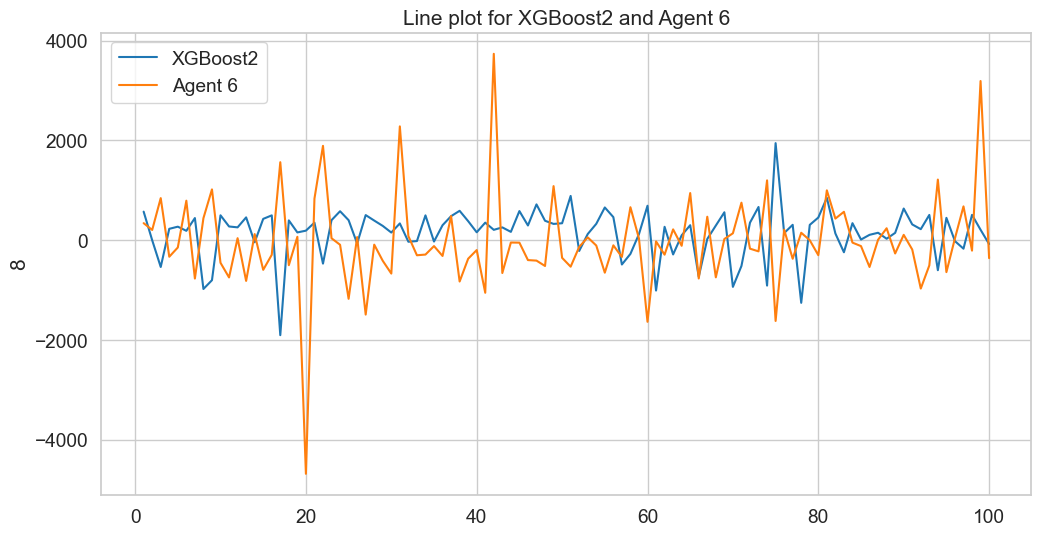

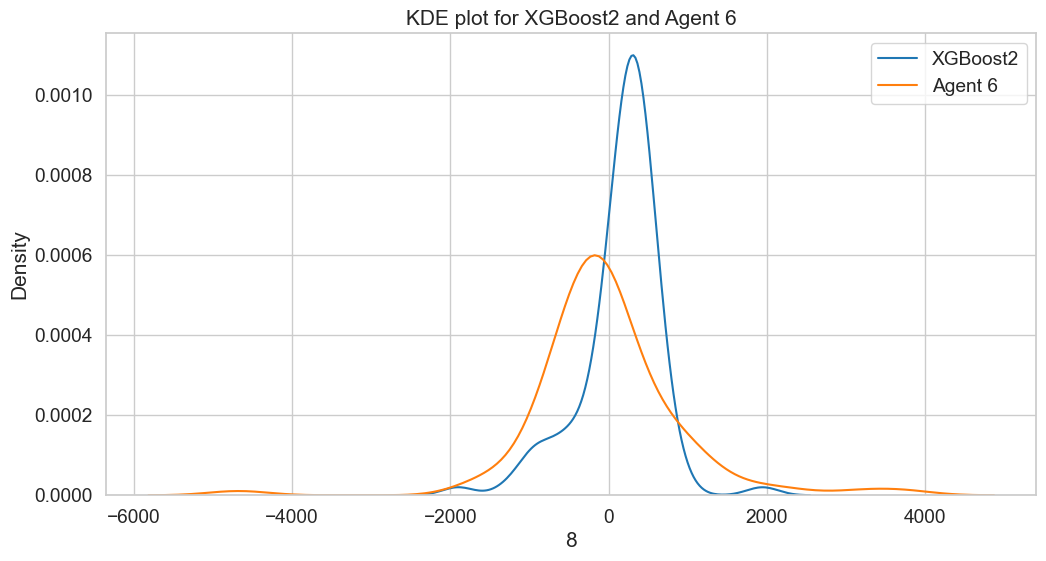

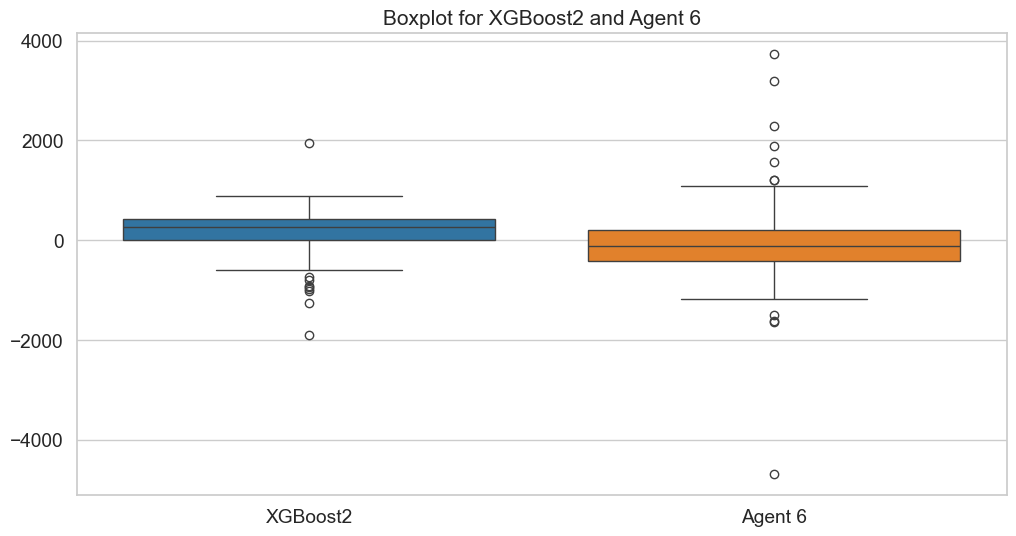

P_value_xgboost2 1.4005875581825263e-07
pvalue_other_agent  7.791776094174606e-09
not normal
There is a statistically significant difference
P-Value 0.00015764773397434754



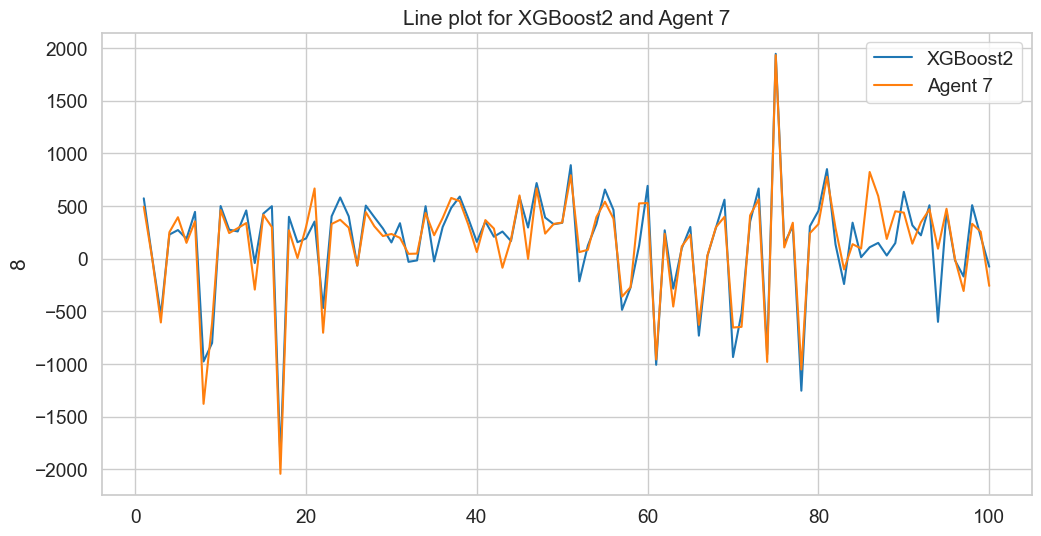

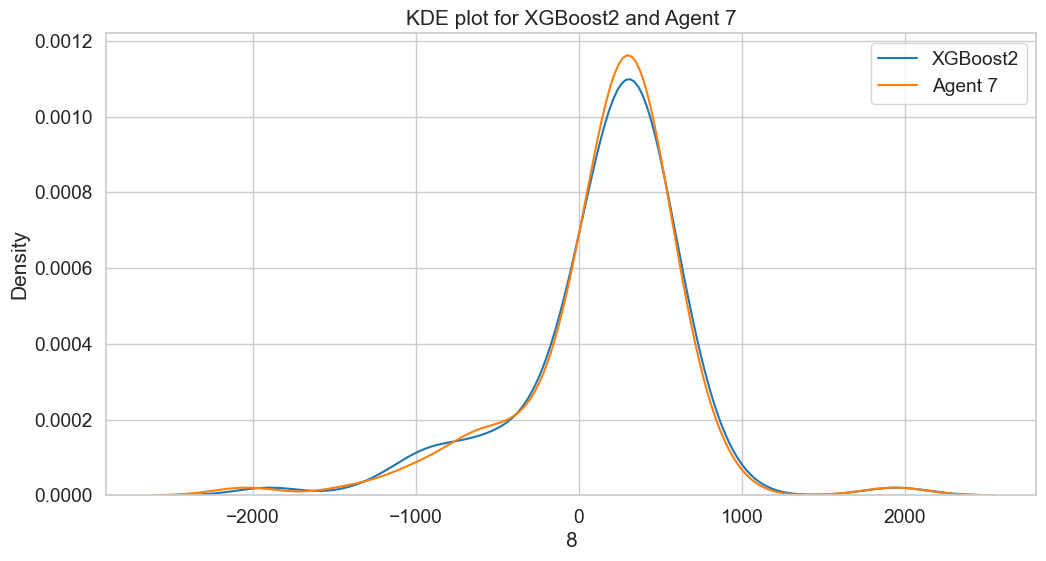

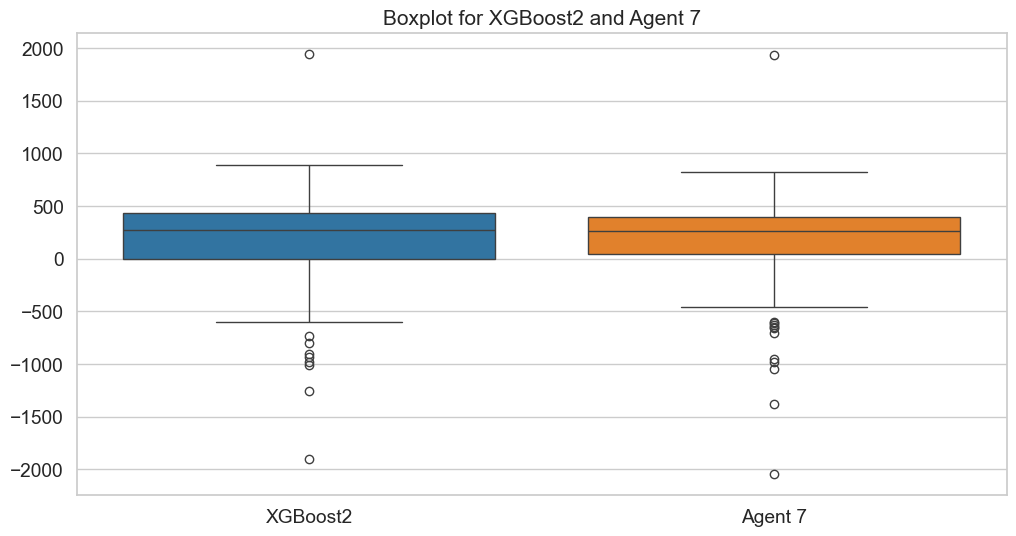

P_value_xgboost2 1.4005875581825263e-07
pvalue_other_agent  1.3860991996388432e-08
not normal
There isn't a statistically significant difference


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

xgboost2_avg_balance = averaged_df.iloc[:, 7]  # XGBoost column

# Loop through columns 1-7 for other agents
for col_index in range(7):
    other_agent_balance = averaged_df.iloc[:, col_index]

    # Line plot for XGBoost and the other agent
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=xgboost2_avg_balance, label='XGBoost2')
    sns.lineplot(data=other_agent_balance, label='Agent ' + str(col_index+1))
    plt.title('Line plot for XGBoost2 and Agent ' + str(col_index+1))
    plt.legend()
    plt.show()

    # KDE plot for the distributions
    plt.figure(figsize=(12, 6))
    sns.kdeplot(xgboost2_avg_balance, label='XGBoost2')
    sns.kdeplot(other_agent_balance, label='Agent ' + str(col_index+1))
    plt.title('KDE plot for XGBoost2 and Agent ' + str(col_index+1))
    plt.legend()
    plt.show()

    # Boxplot for the two distributions
    combined_data = pd.concat([xgboost2_avg_balance.rename('XGBoost2'), 
                               other_agent_balance.rename('Agent ' + str(col_index+1))], axis=1)
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=combined_data)
    plt.title('Boxplot for XGBoost2 and Agent ' + str(col_index+1))
    plt.show()

    # Check normality for both columns
    _, pvalue_xgboost2 = stats.shapiro(xgboost2_avg_balance)
    _, pvalue_other_agent = stats.shapiro(other_agent_balance)
    print("P_value_xgboost2", pvalue_xgboost2)
    print("pvalue_other_agent ", pvalue_other_agent)

    # If both are normally distributed
    if pvalue_xgboost2 > 0.05 and pvalue_other_agent > 0.05:
        print("normal")
        statistic, pvalue = stats.ttest_ind(xgboost2_avg_balance, other_agent_balance)
        if pvalue < 0.05:
            print("There is a statistically significant difference")
        else:
            print("There isn't a statistically significant difference")
    else:
        print("not normal")
        # If either or both are not normally distributed
        statistic, pvalue = stats.mannwhitneyu(xgboost2_avg_balance, other_agent_balance)
        if pvalue < 0.05:
            print("There is a statistically significant difference")
            print("P-Value", pvalue)
            print("")
        else:
            print("There isn't a statistically significant difference")


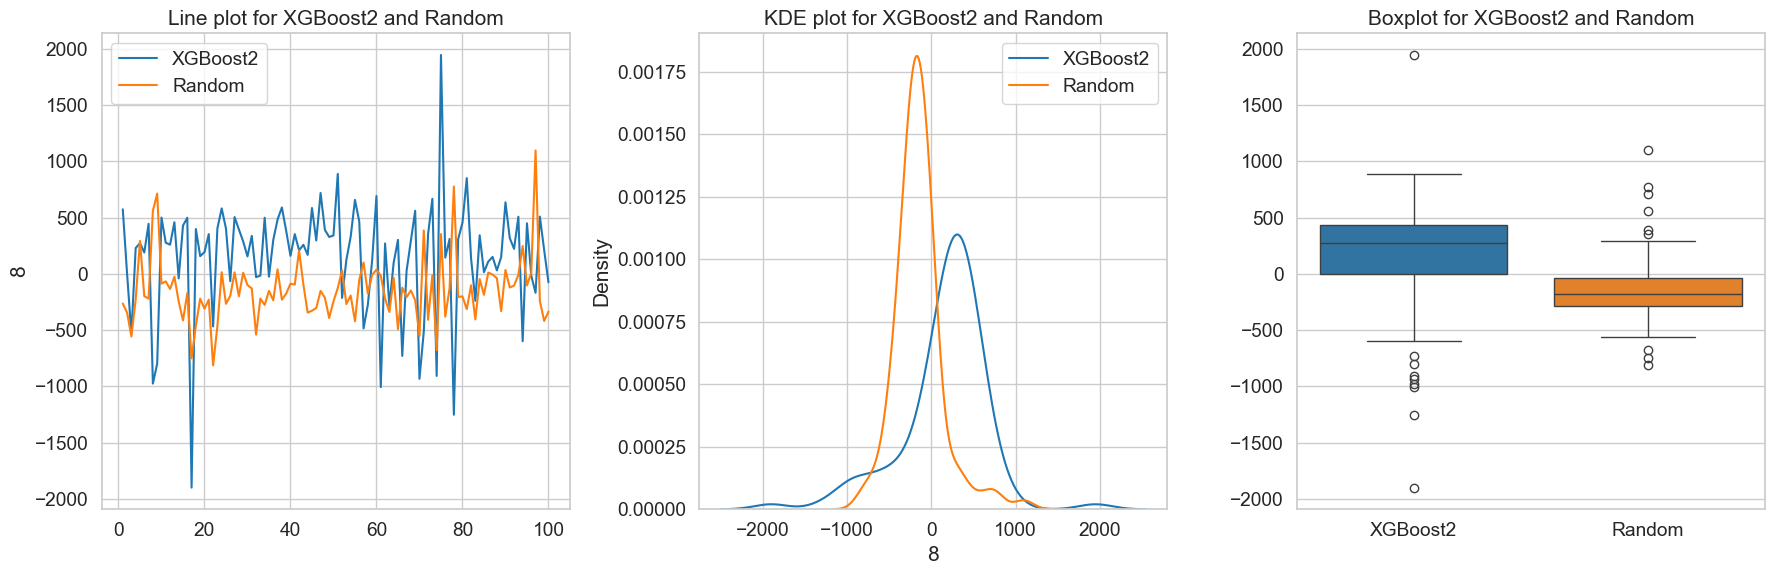

P_value_xgboost2 1.4005875581825263e-07
P_value_Random 5.343473803392102e-07
not normal
There is a statistically significant difference
P-Value 1.3833704547418206e-11



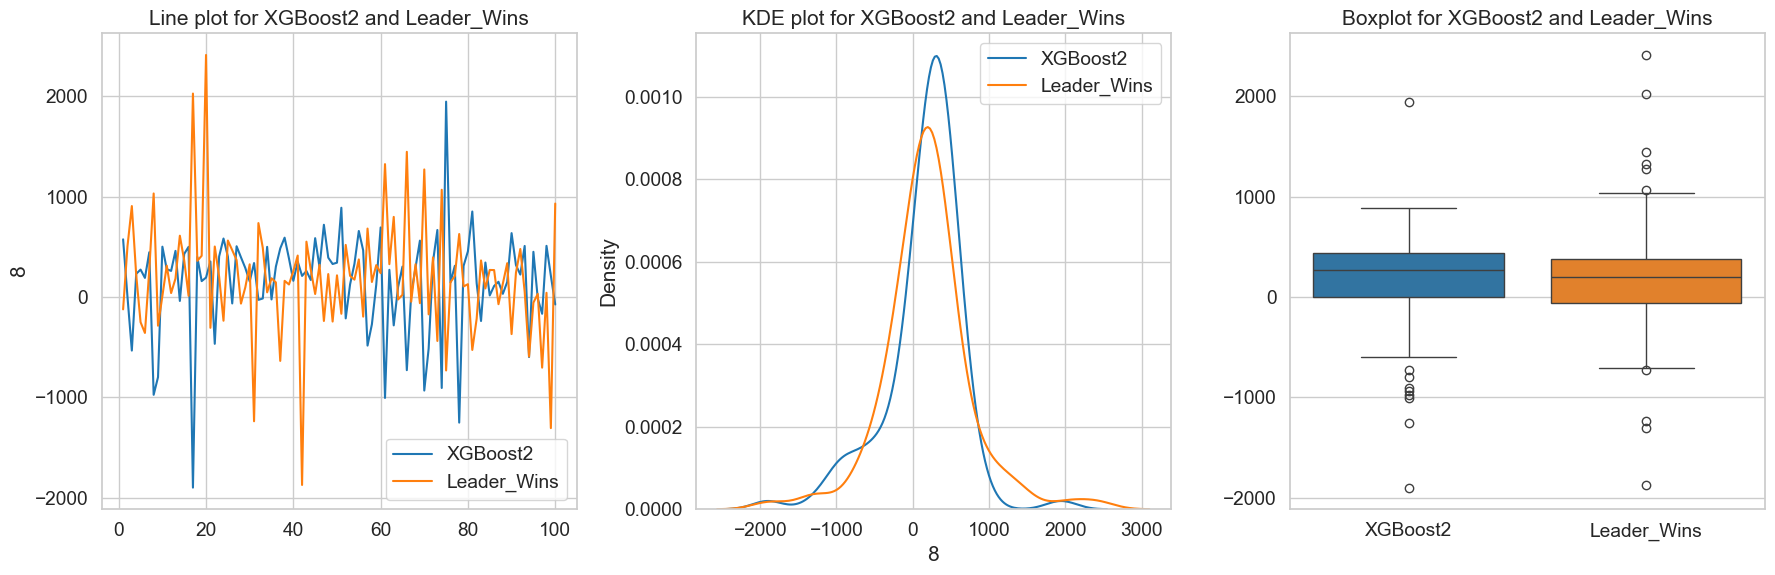

P_value_xgboost2 1.4005875581825263e-07
P_value_Leader_Wins 9.147707877224603e-06
not normal
There isn't a statistically significant difference


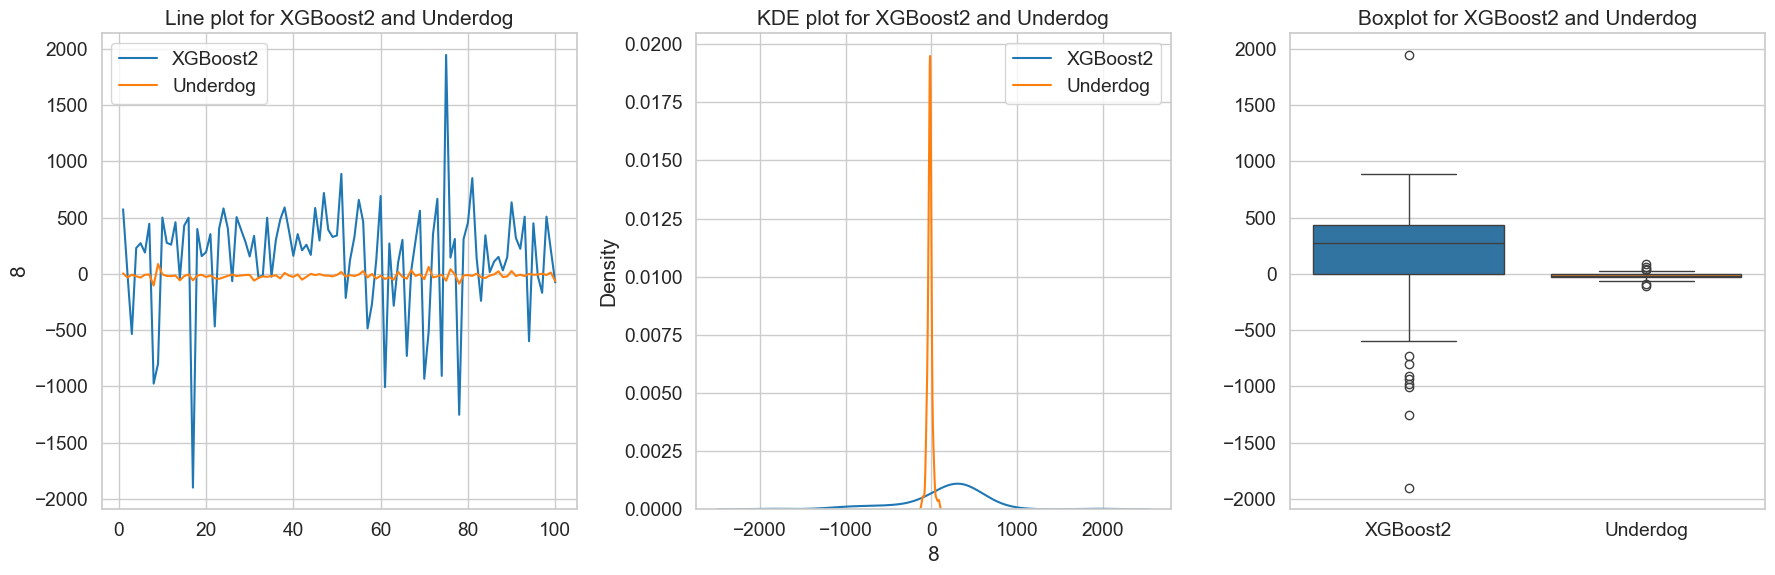

P_value_xgboost2 1.4005875581825263e-07
P_value_Underdog 0.00010199771094736898
not normal
There is a statistically significant difference
P-Value 1.0532515401904806e-10



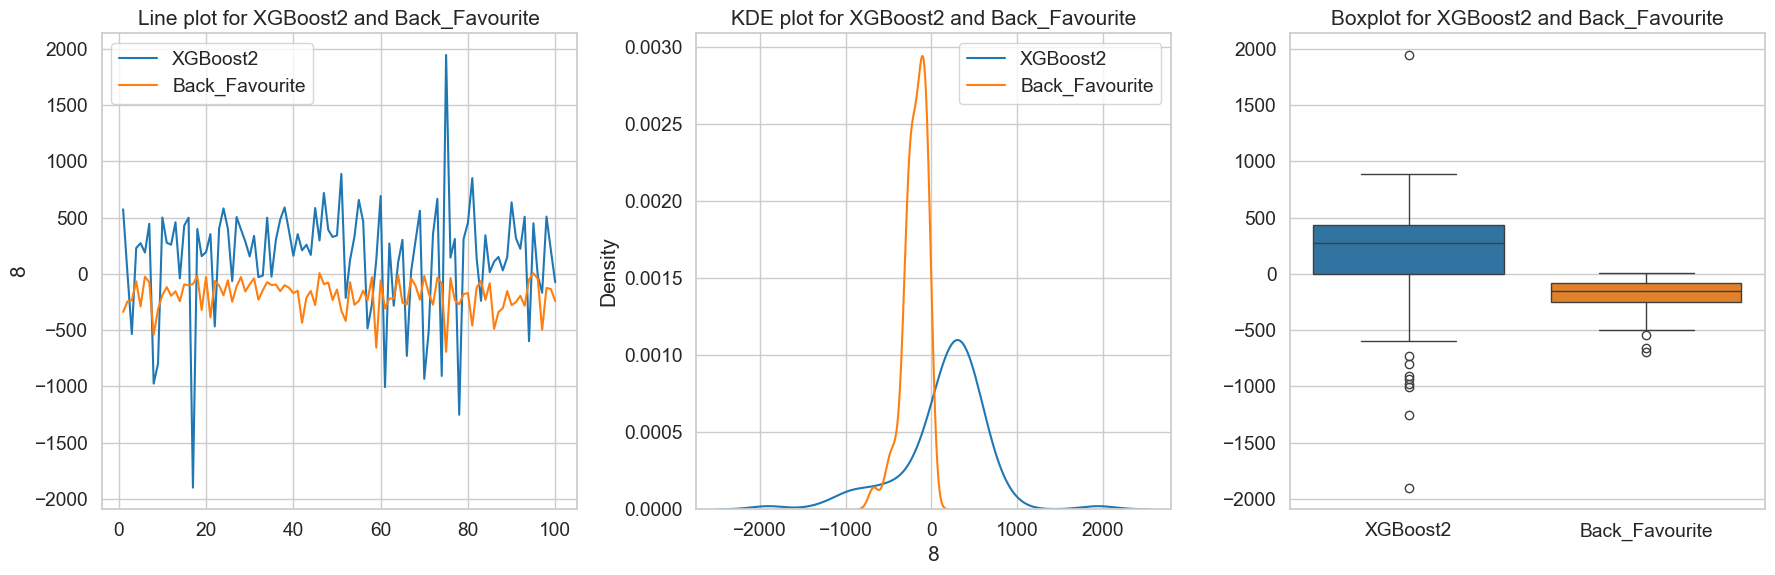

P_value_xgboost2 1.4005875581825263e-07
P_value_Back_Favourite 4.683827448884721e-06
not normal
There is a statistically significant difference
P-Value 7.359157269041792e-16



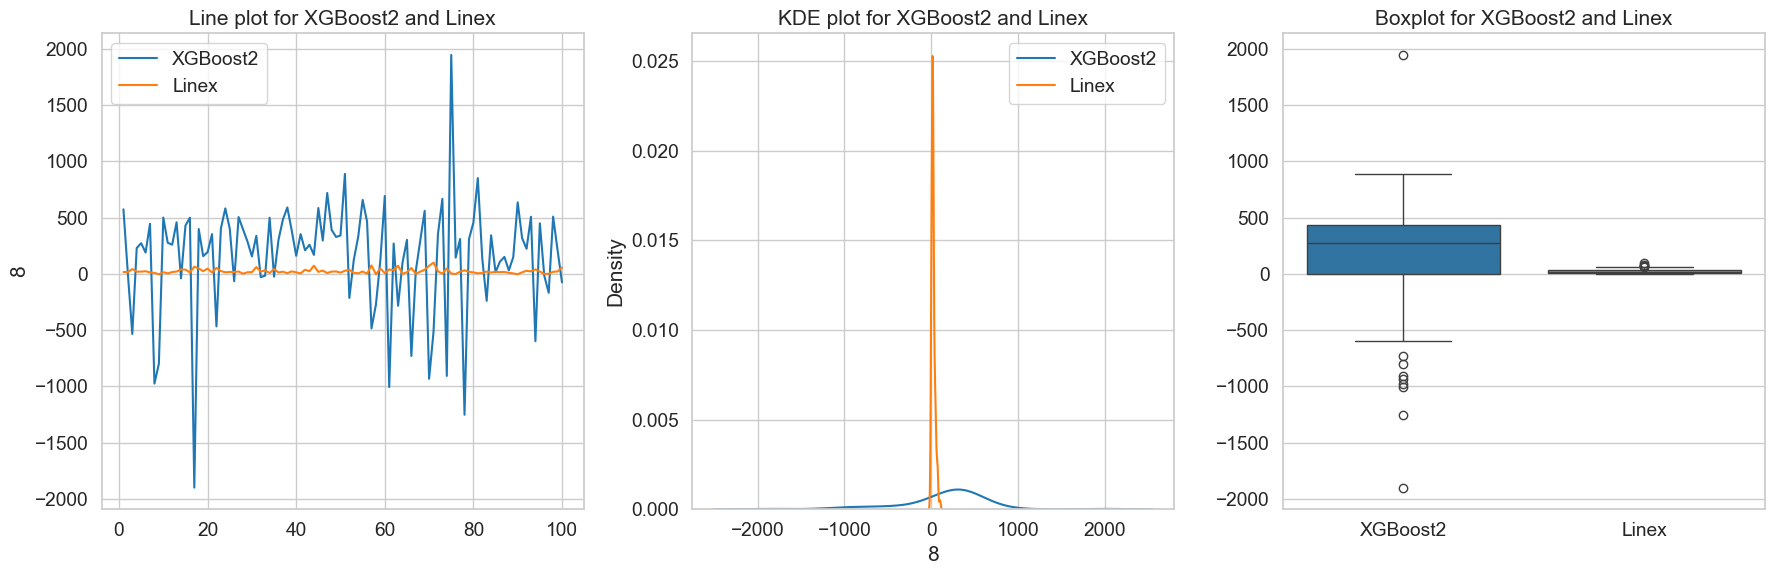

P_value_xgboost2 1.4005875581825263e-07
P_value_Linex 4.129865963641126e-07
not normal
There is a statistically significant difference
P-Value 2.155285997697654e-08



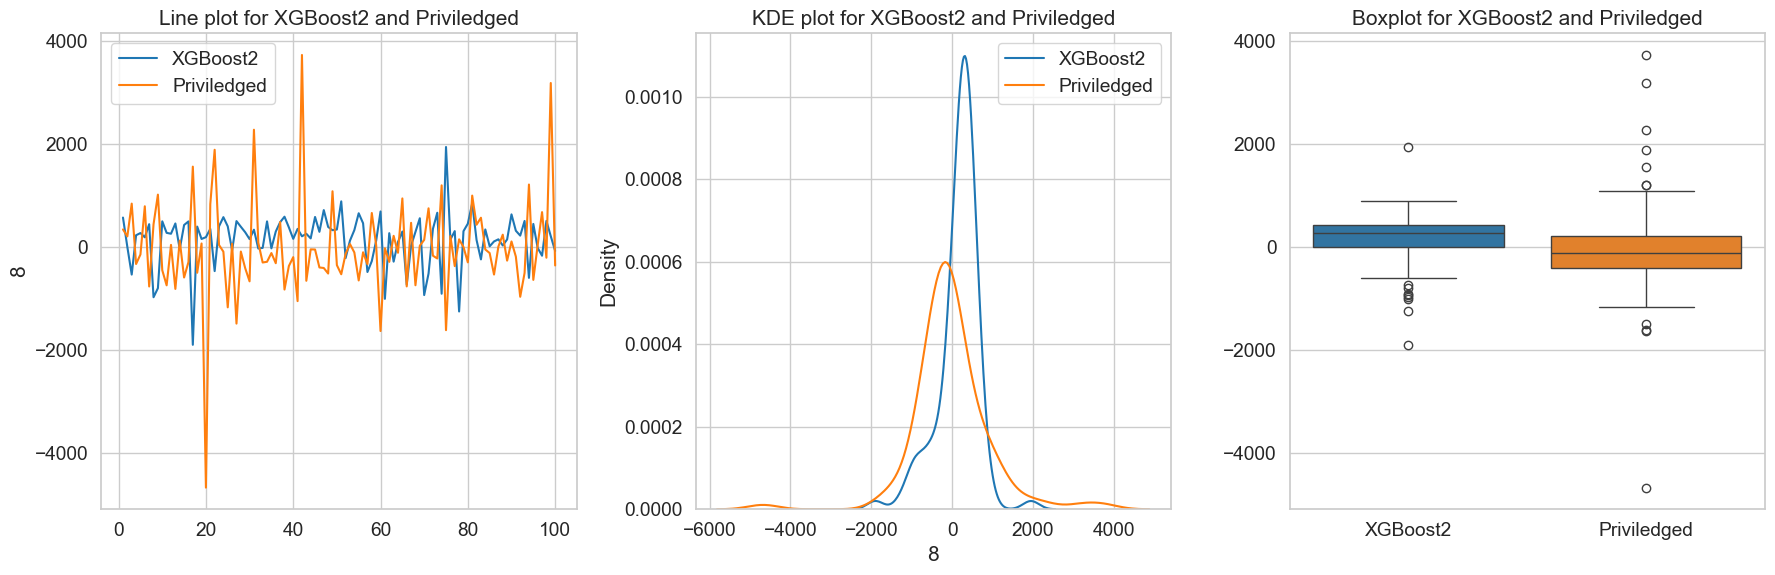

P_value_xgboost2 1.4005875581825263e-07
P_value_Priviledged 7.791776094174606e-09
not normal
There is a statistically significant difference
P-Value 0.00015764773397434754



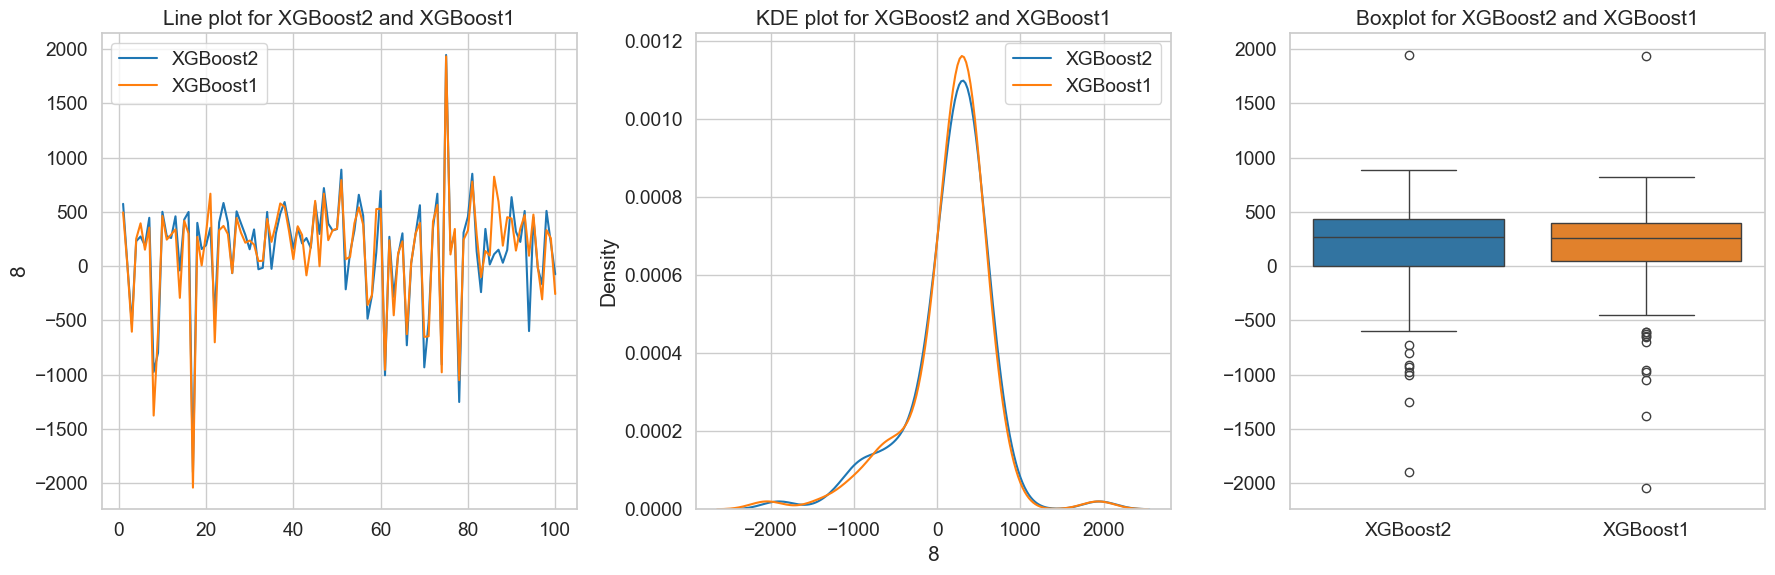

P_value_xgboost2 1.4005875581825263e-07
P_value_XGBoost1 1.3860991996388432e-08
not normal
There isn't a statistically significant difference


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

xgboost2_avg_balance = averaged_df.iloc[:, 7]  # XGBoost column

# Define agent names for easier access and readability
agent_names = ["Random", "Leader_Wins", "Underdog", "Back_Favourite", "Linex", "Priviledged", "XGBoost1"]

# Loop through columns 1-7 for other agents
for col_index in range(7):
    other_agent_balance = averaged_df.iloc[:, col_index]
    agent_name = agent_names[col_index]

    # Group the plots horizontally
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Line plot for XGBoost and the other agent
    sns.lineplot(data=xgboost2_avg_balance, ax=axes[0], label='XGBoost2')
    sns.lineplot(data=other_agent_balance, ax=axes[0], label=agent_name)
    axes[0].set_title(f'Line plot for XGBoost2 and {agent_name}')
    axes[0].legend()

    # KDE plot for the distributions
    sns.kdeplot(xgboost2_avg_balance, ax=axes[1], label='XGBoost2')
    sns.kdeplot(other_agent_balance, ax=axes[1], label=agent_name)
    axes[1].set_title(f'KDE plot for XGBoost2 and {agent_name}')
    axes[1].legend()

    # Boxplot for the two distributions
    combined_data = pd.concat([xgboost2_avg_balance.rename('XGBoost2'), 
                               other_agent_balance.rename(agent_name)], axis=1)
    sns.boxplot(data=combined_data, ax=axes[2])
    axes[2].set_title(f'Boxplot for XGBoost2 and {agent_name}')
    
    plt.tight_layout()
    plt.show()

    # Check normality for both columns
    _, pvalue_xgboost2 = stats.shapiro(xgboost2_avg_balance)
    _, pvalue_other_agent = stats.shapiro(other_agent_balance)
    print("P_value_xgboost2", pvalue_xgboost2)
    print(f"P_value_{agent_name}", pvalue_other_agent)

    # If both are normally distributed
    if pvalue_xgboost2 > 0.05 and pvalue_other_agent > 0.05:
        print("normal")
        statistic, pvalue = stats.ttest_ind(xgboost2_avg_balance, other_agent_balance)
        if pvalue < 0.05:
            print("There is a statistically significant difference")
        else:
            print("There isn't a statistically significant difference")
    else:
        print("not normal")
        # If either or both are not normally distributed
        statistic, pvalue = stats.mannwhitneyu(xgboost2_avg_balance, other_agent_balance)
        if pvalue < 0.05:
            print("There is a statistically significant difference")
            print("P-Value", pvalue)
            print("")
        else:
            print("There isn't a statistically significant difference")


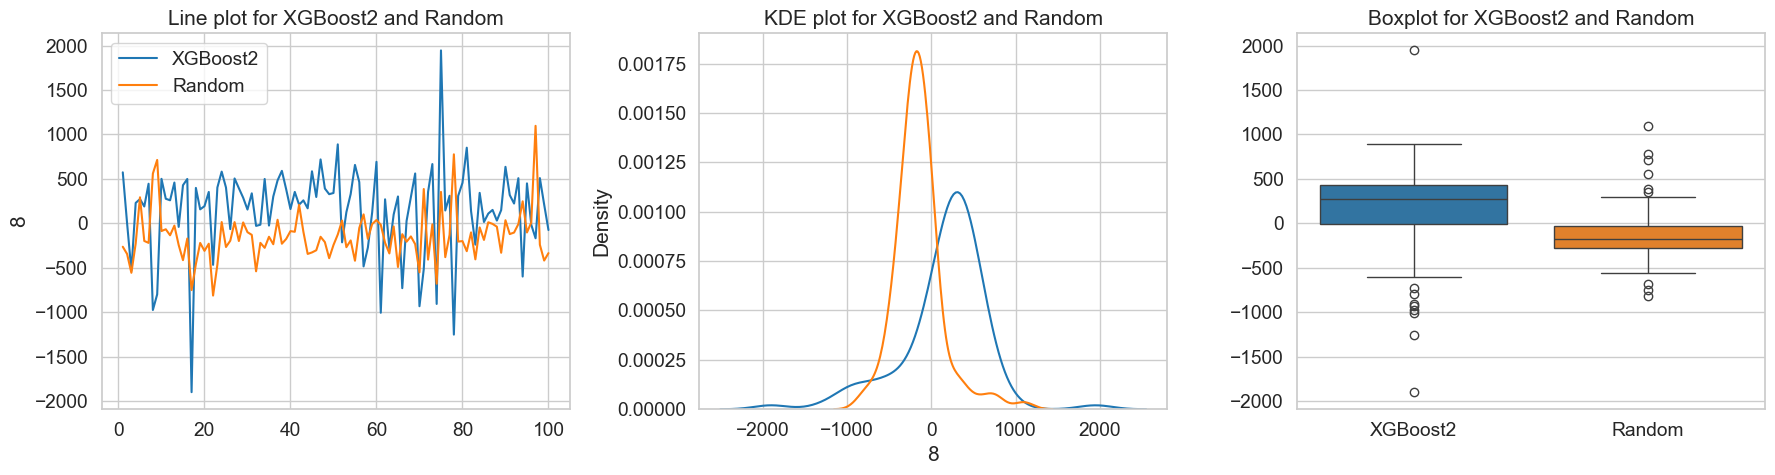

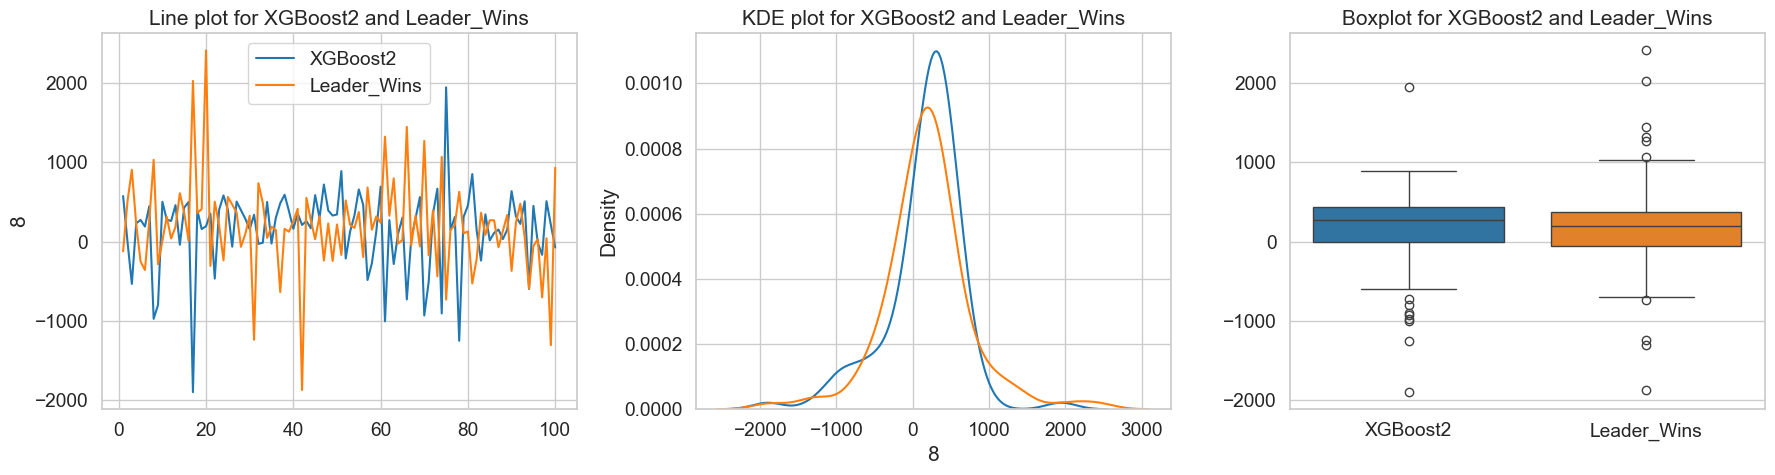

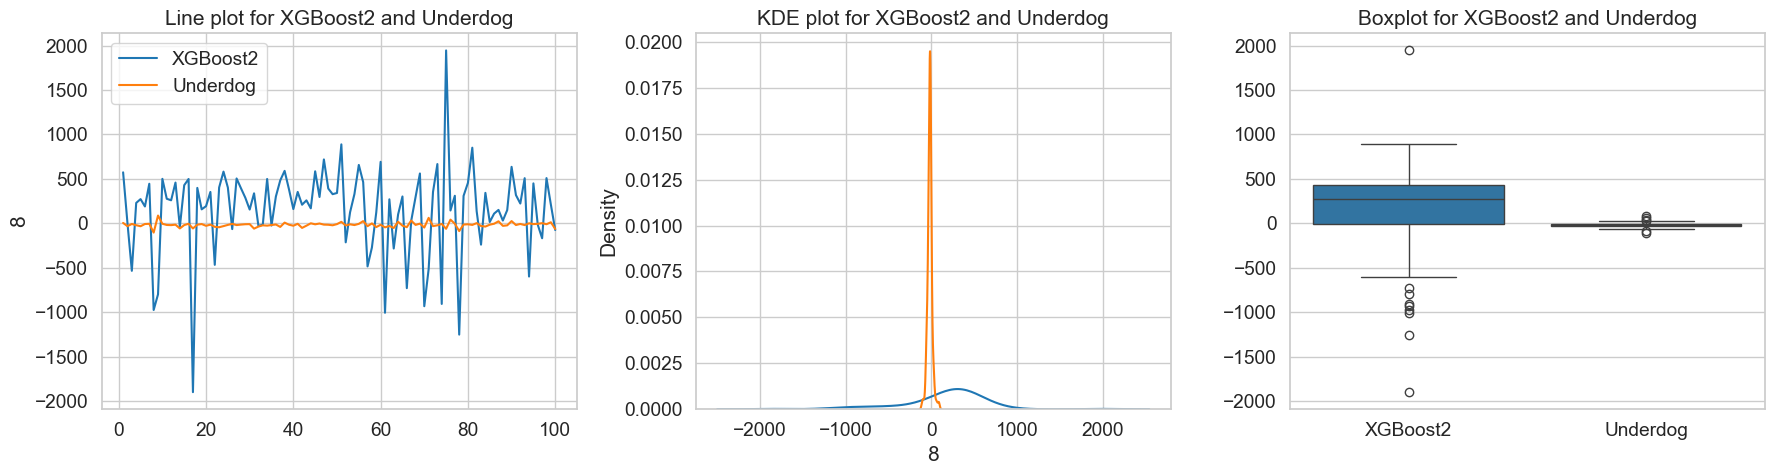

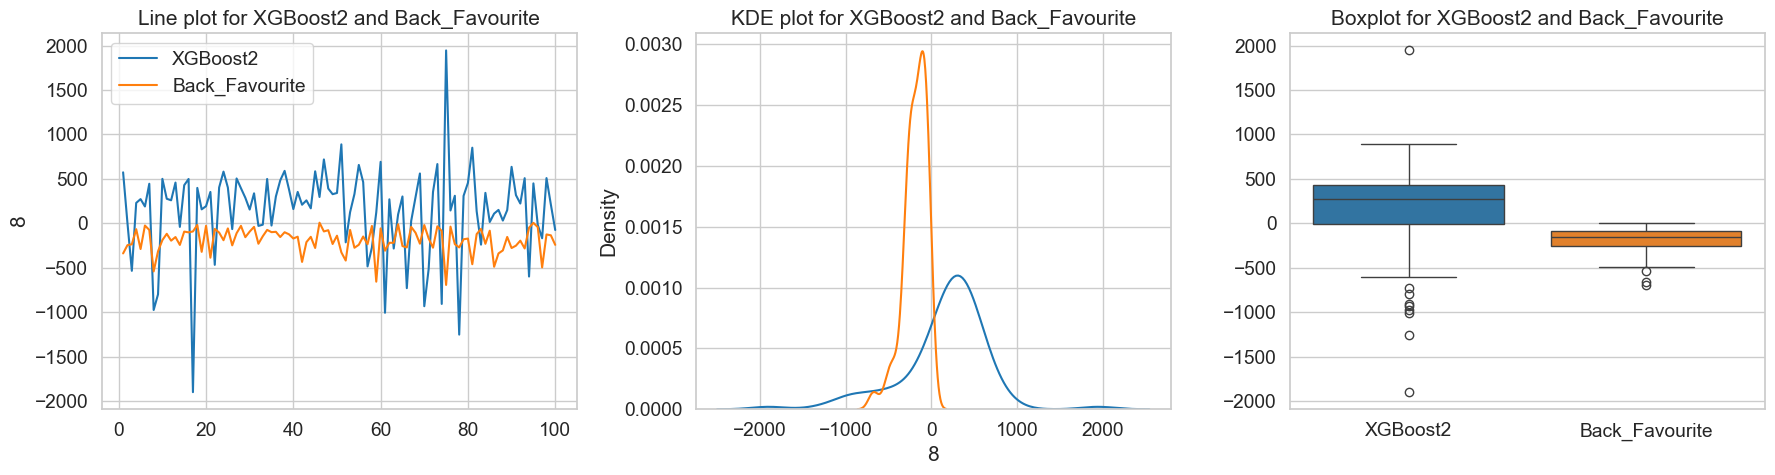

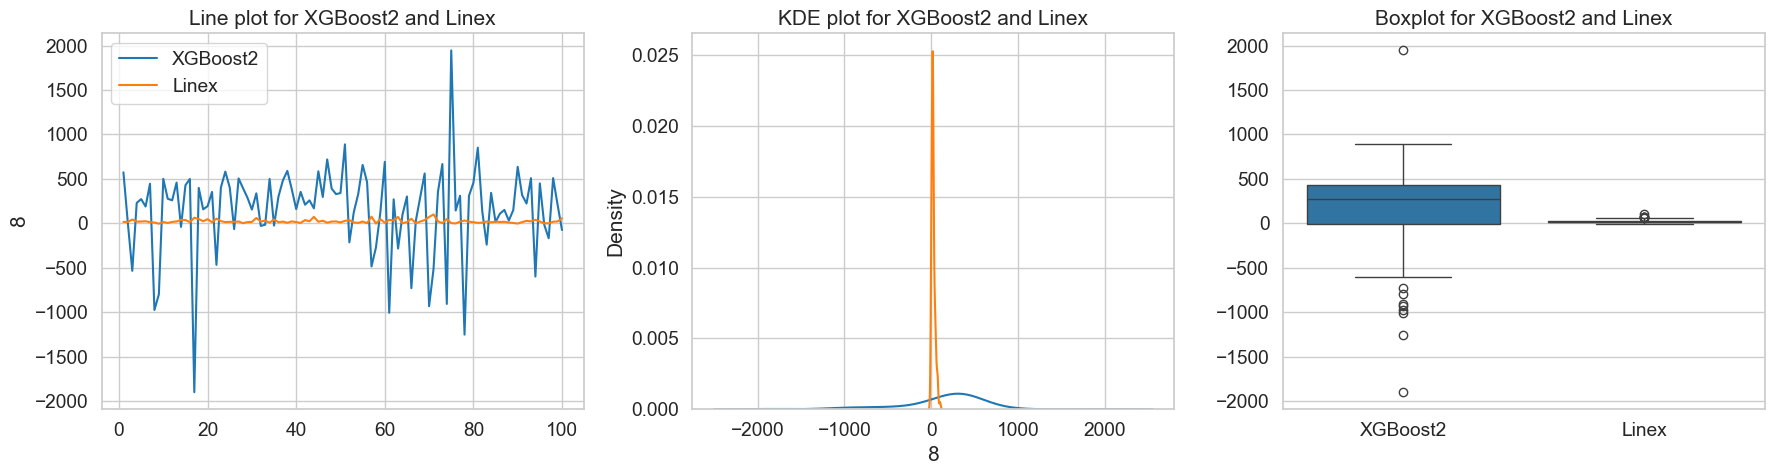

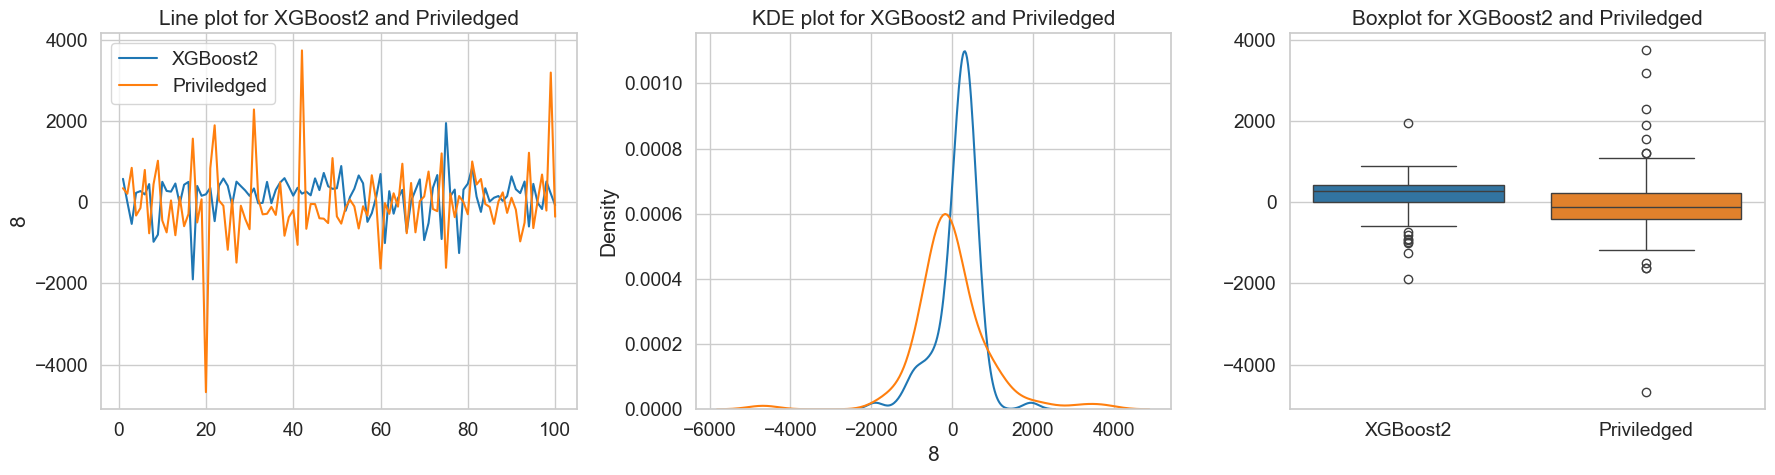

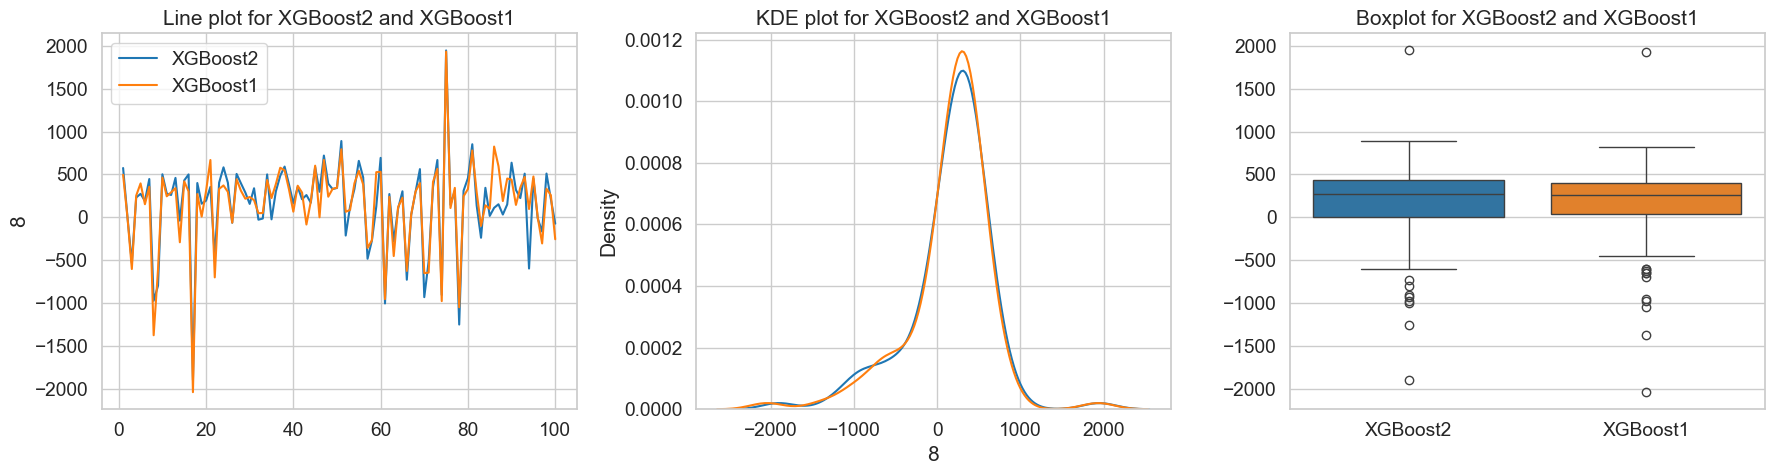

In [18]:
xgboost2_avg_balance = averaged_df.iloc[:, 7]  # XGBoost column

# Define agent names for easier access and readability
agent_names = ["Random", "Leader_Wins", "Underdog", "Back_Favourite", "Linex", "Priviledged", "XGBoost1"]

# Setting style and text scale for seaborn plots
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.25)  # Adjust the font_scale to increase text size

# Loop through columns 1-7 for other agents
for col_index in range(7):
    other_agent_balance = averaged_df.iloc[:, col_index]
    agent_name = agent_names[col_index]

    # Group the plots horizontally with modified height
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # Decreased the height from 6 to 5

    # Line plot for XGBoost and the other agent
    sns.lineplot(data=xgboost2_avg_balance, ax=axes[0], label='XGBoost2')
    sns.lineplot(data=other_agent_balance, ax=axes[0], label=agent_name)
    axes[0].set_title(f'Line plot for XGBoost2 and {agent_name}')

    # KDE plot for the distributions
    sns.kdeplot(xgboost2_avg_balance, ax=axes[1], label='XGBoost2')
    sns.kdeplot(other_agent_balance, ax=axes[1], label=agent_name)
    axes[1].set_title(f'KDE plot for XGBoost2 and {agent_name}')

    # Boxplot for the two distributions
    combined_data = pd.concat([xgboost2_avg_balance.rename('XGBoost2'), 
                               other_agent_balance.rename(agent_name)], axis=1)
    sns.boxplot(data=combined_data, ax=axes[2])
    axes[2].set_title(f'Boxplot for XGBoost2 and {agent_name}')
    
    plt.tight_layout()
    plt.show()